# 211016 Basic Plots

In [3]:
from pathlib import Path

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import h5py as h5
from tqdm import tqdm

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Setup

In [6]:
DATESTR = '211016'
NBNAME = DATESTR + '-basic-plots'

In [7]:
infiles = dict(
    genomes=Path('data-processed/211015-combine-data/211015-gambit-ani-genomes.csv'),
    data=Path('data-intermediate/211015-combine-data/data.nc'),
    assembly_stats=Path('data-processed/211016-additional-genome-stats/211016-assembly-stats.csv'),
)

In [8]:
outfiles = dict(
    gambit_ani_scatter=f'reports/{DATESTR}-gambit-vs-ani.png',
    gambit_ani_spearman=f'reports/{DATESTR}-gambit-ani-spearman.png',
)

## Code

In [9]:
def get_datasets(group):
    return {name: child[:] for name, child in group.items()}

## Load data

### Genomes

In [10]:
genomes = pd.read_csv(infiles['genomes'], index_col=[0, 1])

In [11]:
_stats = pd.read_csv(infiles['assembly_stats'], index_col=[0, 1])
genomes = pd.concat([genomes, _stats], axis=1)

### Common

In [12]:
common_ds = xr.load_dataset(infiles['data'], group='common')

common_df = common_ds.to_dataframe(['data_set', 'param'])

In [13]:
gsets = common_ds.indexes['data_set']
ngsets = len(gsets)

### Params

In [14]:
params_df = common_ds \
    .drop_dims('data_set') \
    .to_dataframe() \
    .set_index(['prefix_len', 'prefix_version', 'k'], drop=True)

In [15]:
def get_param(prefix_len, prefix_version, k):
    return params_df.index.get_loc((prefix_len, prefix_version, k))

In [16]:
gambitdb_param = get_param(5, 0, 11)

### By genome

In [17]:
genome_dss = {gset: xr.load_dataset(infiles['data'], group='genome/' + gset) for gset in gsets}

## ?

In [20]:
df = genomes.loc['konstantinidis_2005']

<AxesSubplot:xlabel='ncontigs', ylabel='Count'>

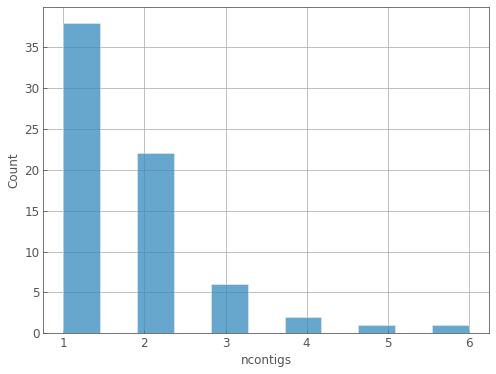

In [21]:
sns.histplot(df['ncontigs'])